# Random Forest
An ensemble learning algorithm-it builds many decision trees, not just one, and combines their predictions to improve accuracy and robustness

> Don’t trust one tree. Ask a forest full of trees, and take a vote.

## Process
1. Bootstrap sampling: For each tree, take a random sample from the training data with replacement.

2. Train a tree: For each split in the tree, consider only a random subset of features.
3. Repeat: Build many such trees
4. Vote:

    ***For classification:*** each tree votes; majority wins.

    ***For regression:*** average the outputs.

Now to understand random forest we need to understand the following methods and ideas:

# Bias -Variance Trade-off
we are training a model and want it to perform well on new, unseen data, not just on your training set.

But here’s the catch:

> If your model is too simple → it misses the patterns → underfits
If it's too complex → it chases noise → overfits

This tension between simplicity and complexity is the bias-variance trade-off.

## Bias
* Error due to wrong assumptions
* A high bias model is too simple
* It underfits the data (the model does not learn enough)

## Variance
* Error due to sensitivity to small changes in the training data

* A high variance model is too complex


* It overfits the training data (the model learns too much - more than it should)

## Trade -off
As model complexity increases, bias decreases but variance increases.

There’s a sweet spot: where total error (bias² + variance + irreducible noise) is minimized.



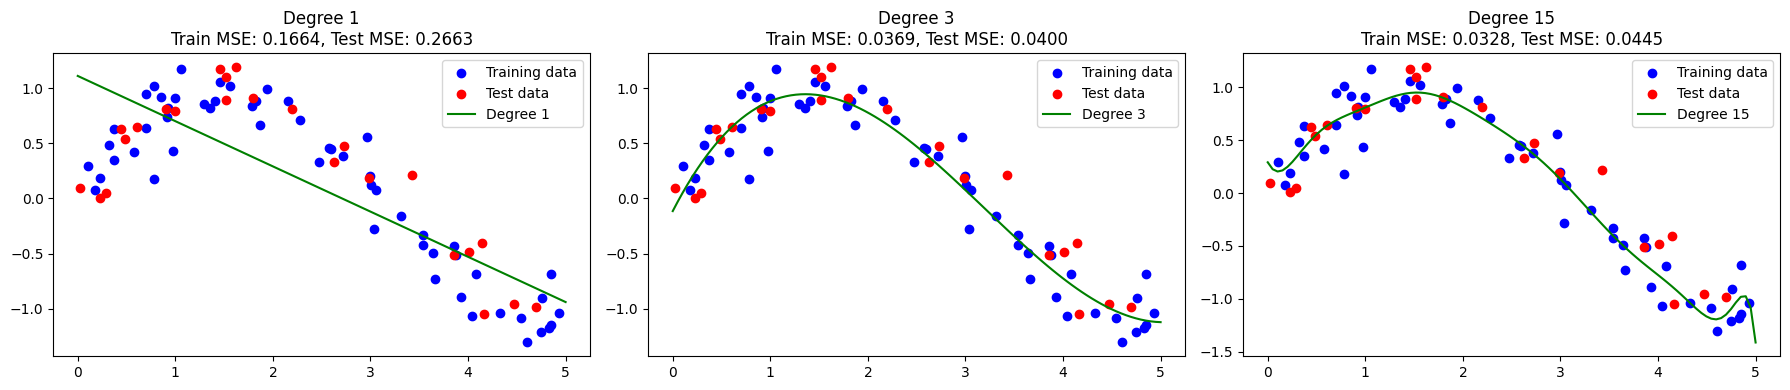

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#  Step 1: Generate noisy sine wave data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

#  Step 2: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Step 3: Train models with different degrees
degrees = [1, 3, 15]
plt.figure(figsize=(18, 4))

train_errors = []
test_errors = []

for i, degree in enumerate(degrees, 1):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='red', label='Test data')
    x_range = np.linspace(0, 5, 100).reshape(-1, 1)
    plt.plot(x_range, model.predict(x_range), color='green', label=f'Degree {degree}')
    plt.title(f"Degree {degree}\nTrain MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    plt.legend()

plt.tight_layout()
plt.show()


#Explanation:
| Degree | Train MSE | Test MSE | Interpretation                        |
| ------ | --------- | -------- | ------------------------------------- |
| 1      | 0.166     | 0.266    | **High bias** → underfitting          |
| 3      | 0.037     | 0.040    | **Balanced** → optimal generalization |
| 15     | 0.032     | 0.163    | **High variance** → overfitting       |



* Degree 1 (Underfit): The model is too simple. Can't capture  the curve. Low variance, high bias.

* Degree 3 (Goldilocks zone): Good fit, minimal error on both training and test sets.

* Degree 15 (Overfit): Fits noise in training data. Low bias, high variance → fails on test set.

#Prunning
Pruning is a technique used to reduce the size of decision trees by removing parts that do not provide meaningful power.

* Decision trees can grow very deep and complex.

* They may memorize training data (high variance).

* Pruning simplifies the model for better generalization.

##Step-by-Step Pruning (via Hyperparameters)
In scikit-learn, pruning is done preemptively by setting limits on how large a tree can grow. We’ll show the effect of this by comparing:

* An unpruned decision tree (default: can grow very deep)

* A pruned decision tree (e.g., max_depth=6, min_samples_leaf=10)

Unpruned Train Accuracy: 1.0
Pruned Train Accuracy  : 0.8685714285714285
Unpruned Test Accuracy : 0.8
Pruned Test Accuracy   : 0.8133333333333334


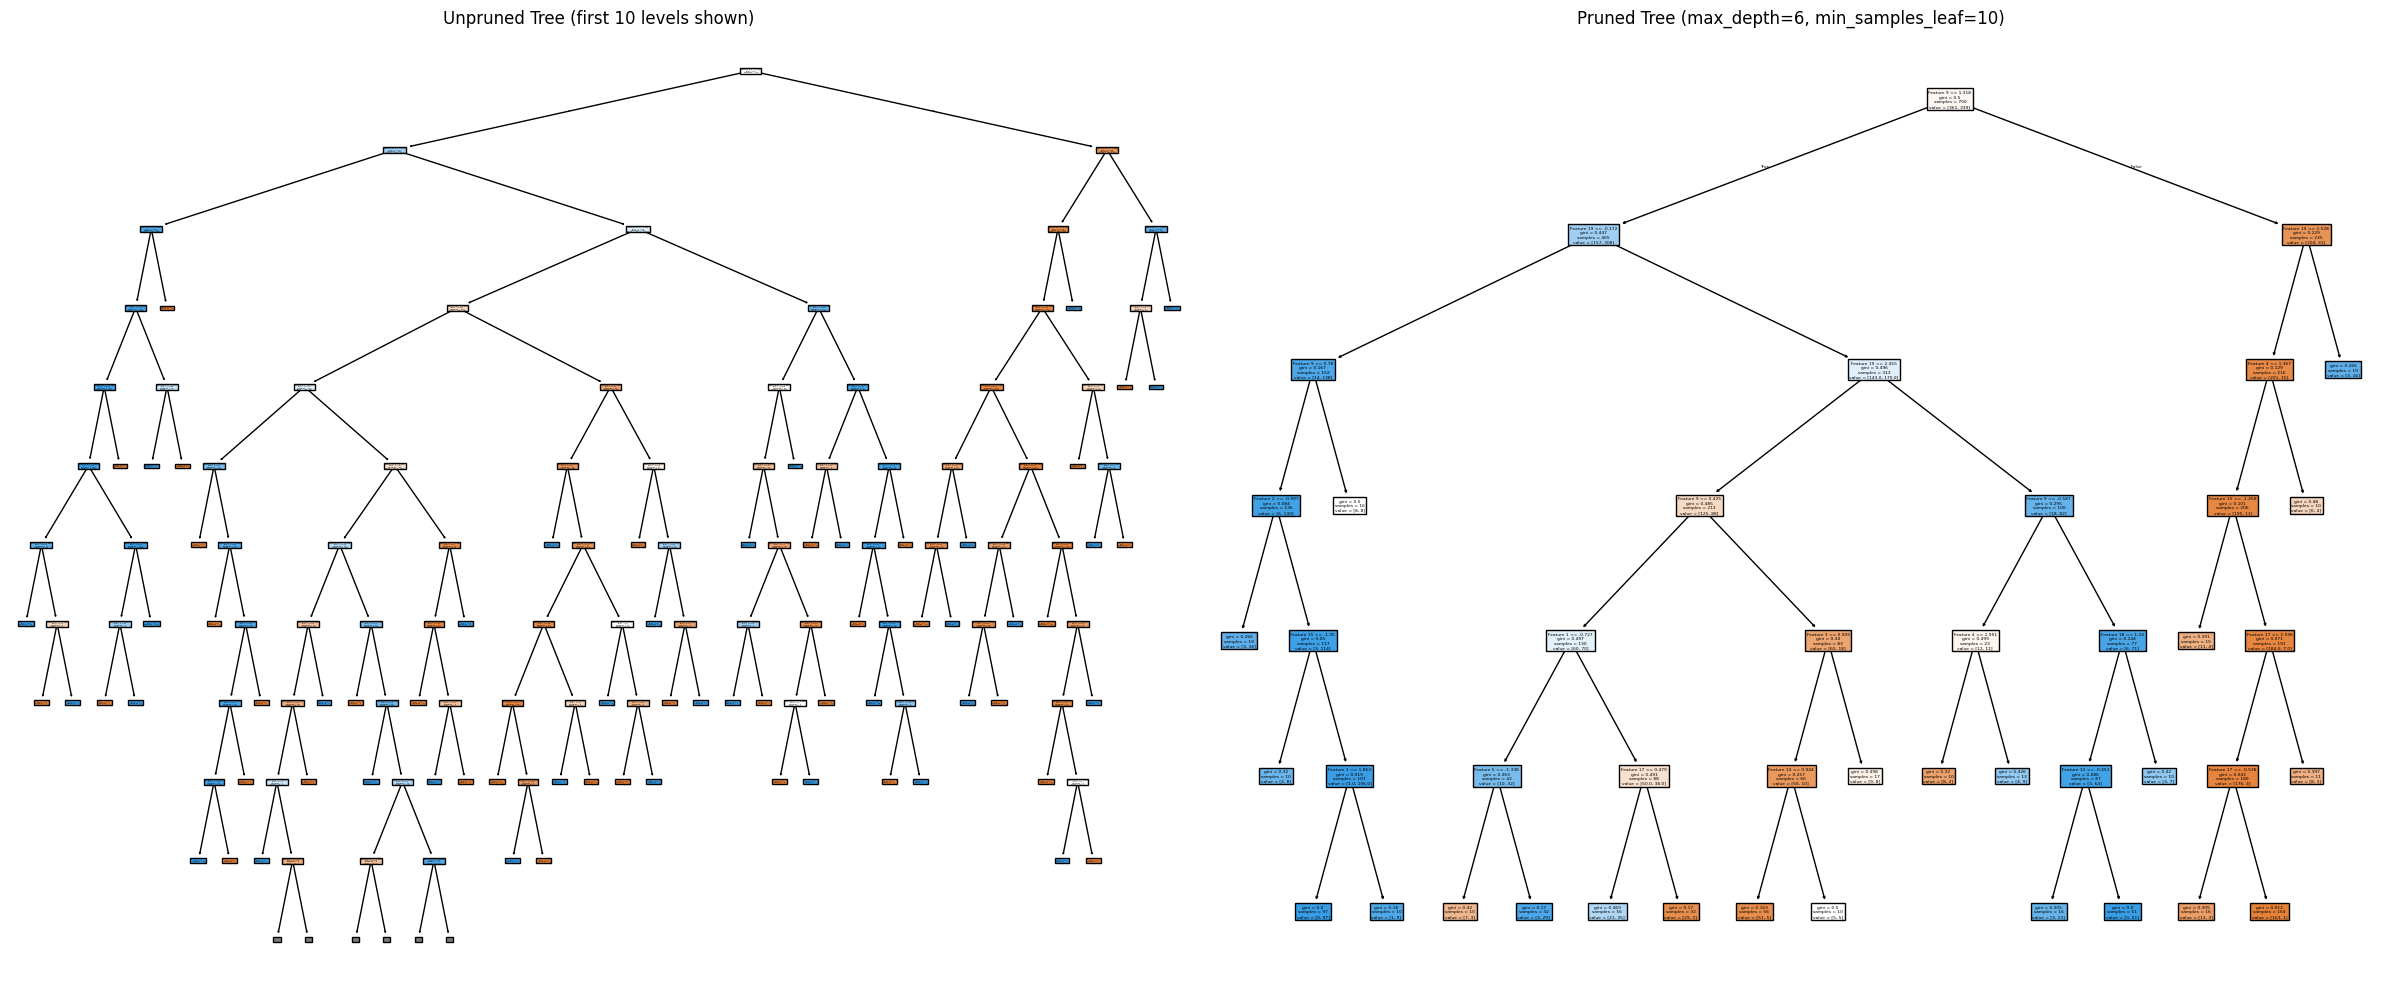

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    flip_y=0.1,
    class_sep=0.8,
    random_state=42
)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


tree_unpruned = DecisionTreeClassifier(random_state=42)
tree_unpruned.fit(X_train, y_train)


tree_pruned = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)
tree_pruned.fit(X_train, y_train)


acc_train_unpruned = accuracy_score(y_train, tree_unpruned.predict(X_train))
acc_test_unpruned = accuracy_score(y_test, tree_unpruned.predict(X_test))
acc_train_pruned = accuracy_score(y_train, tree_pruned.predict(X_train))
acc_test_pruned = accuracy_score(y_test, tree_pruned.predict(X_test))


print("Unpruned Train Accuracy:", acc_train_unpruned)
print("Pruned Train Accuracy  :", acc_train_pruned)
print("Unpruned Test Accuracy :", acc_test_unpruned)

print("Pruned Test Accuracy   :", acc_test_pruned)

# Feature names for 20 features
feature_names = [f"Feature {i+1}" for i in range(X.shape[1])]

# 🌲 Plot trees
plt.figure(figsize=(24, 10))

plt.subplot(1, 2, 1)
plot_tree(tree_unpruned, filled=True, feature_names=feature_names, max_depth=10)
plt.title("Unpruned Tree (first 10 levels shown)")

plt.subplot(1, 2, 2)
plot_tree(tree_pruned, filled=True, feature_names=feature_names)
plt.title("Pruned Tree (max_depth=6, min_samples_leaf=10)")

plt.tight_layout()
plt.show()


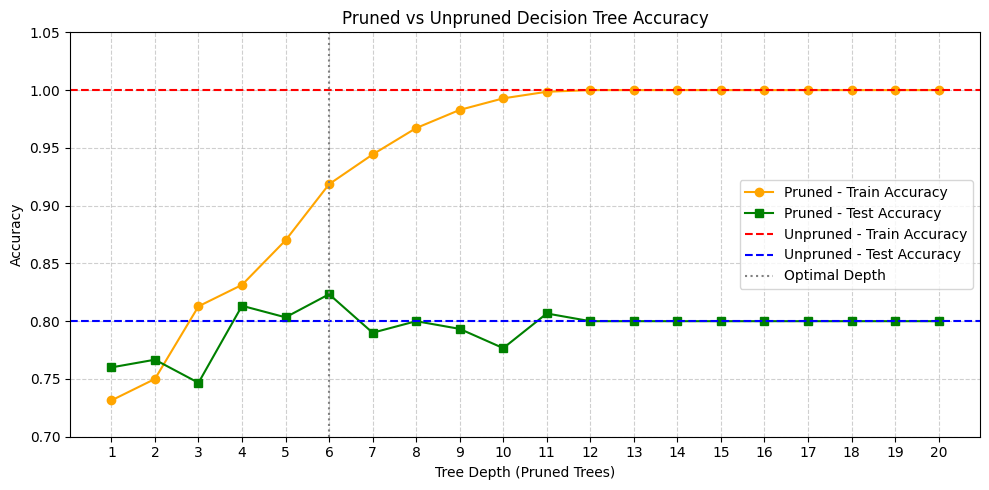

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    flip_y=0.1,
    class_sep=0.8,
    random_state=42
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


tree_unpruned = DecisionTreeClassifier(random_state=42)
tree_unpruned.fit(X_train, y_train)

acc_train_unpruned = accuracy_score(y_train, tree_unpruned.predict(X_train))
acc_test_unpruned = accuracy_score(y_test, tree_unpruned.predict(X_test))


depths = list(range(1, 21))
pruned_train_accuracies = []
pruned_test_accuracies = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, tree.predict(X_train))
    test_acc = accuracy_score(y_test, tree.predict(X_test))

    pruned_train_accuracies.append(train_acc)
    pruned_test_accuracies.append(test_acc)


plt.figure(figsize=(10, 5))

plt.plot(depths, pruned_train_accuracies, marker='o', label='Pruned - Train Accuracy', color='orange')
plt.plot(depths, pruned_test_accuracies, marker='s', label='Pruned - Test Accuracy', color='green')

plt.axhline(y=acc_train_unpruned, color='red', linestyle='--', label='Unpruned - Train Accuracy')
plt.axhline(y=acc_test_unpruned, color='blue', linestyle='--', label='Unpruned - Test Accuracy')
plt.axvline(x=6, linestyle=':', color='gray', label='Optimal Depth')

plt.title('Pruned vs Unpruned Decision Tree Accuracy')
plt.xlabel('Tree Depth (Pruned Trees)')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.ylim(0.7, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


This plot demonstrates the bias-variance trade-off by comparing a fixed unpruned tree with a series of pruned trees at increasing max_depth.

* The unpruned tree achieves perfect training accuracy (100%) but lower test accuracy (~80%), indicating overfitting — it memorized the training data but failed to generalize.

* In contrast, pruned trees with controlled depth reduce overfitting by limiting complexity. Although they sacrifice a bit of training accuracy, their test accuracy peaks around depth 6–7, showing better generalization.

* Beyond a certain depth, test accuracy drops for pruned trees, illustrating how increasing complexity can reintroduce variance.

###Conclusion:
Pruning helps prevent overfitting by simplifying the model and allows it to generalize better to unseen data — a key defense against high variance in noisy or high-dimensional datasets.











##  Bagging (Bootstrap Aggregating)

###  What is Bagging?

Bagging is a technique where **multiple models** (usually decision trees) are trained on **random subsets** of the data (with replacement), and their predictions are combined to make the final decision.

> It's like asking 50 slightly different students to solve the same problem and then voting on the best answer.

---

###  How It Works

1. **Bootstrap Sampling**: Create random datasets from the original training data **with replacement**.
2. **Train Models**: Train one model (e.g., a decision tree) on each sample.
3. **Aggregate**: Final output is the **majority vote** (for classification) or **average** (for regression).

---

###  Why Use Bagging?

- **Reduces variance** and prevents overfitting.
- Works best with **high-variance models** like decision trees.
- Improves **stability** and **accuracy** on noisy data.

---

###  Key Parameters (in `BaggingClassifier`)

| Parameter         | Meaning                                      |
|------------------|----------------------------------------------|
| `estimator`      | The base model to train (e.g., DecisionTree) |
| `n_estimators`   | How many models to train                     |
| `max_samples`    | % of data each model sees                    |
| `bootstrap=True` | Whether to sample with replacement           |

---

###  Summary

> Bagging helps build **stronger models** by combining many **weaker models trained on different views** of the data. It’s the foundation of Random Forests.



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification


X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=5, n_redundant=5,
    flip_y=0.1, class_sep=0.8, random_state=42
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


base_tree = DecisionTreeClassifier(random_state=42)


bagged_model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)


base_tree.fit(X_train, y_train)
bagged_model.fit(X_train, y_train)


y_pred_tree = base_tree.predict(X_test)
y_pred_bagged = bagged_model.predict(X_test)


acc_tree = accuracy_score(y_test, y_pred_tree)
acc_bagged = accuracy_score(y_test, y_pred_bagged)

print("Base Decision Tree Accuracy :", acc_tree)
print("Bagging Classifier Accuracy :", acc_bagged)


Base Decision Tree Accuracy : 0.8
Bagging Classifier Accuracy : 0.8466666666666667


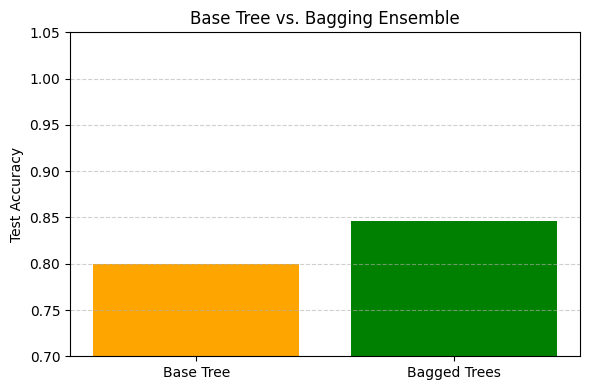

In [ ]:
# Compare base vs bagged
labels = ['Base Tree', 'Bagged Trees']
scores = [acc_tree, acc_bagged]

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['orange', 'green'])
plt.ylabel("Test Accuracy")
plt.title("Base Tree vs. Bagging Ensemble")
plt.ylim(0.7, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#How Random Forest is different than Bagging

| Step | What Random Forest Adds                                                                                |
| ---- | ------------------------------------------------------------------------------------------------------ |
| 1 | Bootstrap sample — ✅ same as Bagging                                                                   |
| 2  | Train many trees independently — ✅ same                                                                |
| 3  | **At each split**, choose a **random subset of features** instead of all features — 🔥 this is the key |
| 4  | Combine predictions — ✅ majority vote or average                                                       |

#Parameters of random forest classifier
| Parameter           | Type                            | Description                                                                                         |
| ------------------- | ------------------------------- | --------------------------------------------------------------------------------------------------- |
| `n_estimators`      | `int`                           | Number of trees in the forest. More trees → more stable results (default: 100).                     |
| `max_depth`         | `int`/`None`                    | Max depth of each tree. Controls overfitting.                                                       |
| `min_samples_split` | `int`/`float`                   | Minimum samples required to split an internal node (default: 2).                                    |
| `min_samples_leaf`  | `int`/`float`                   | Minimum samples required at a leaf node. Good for smoothing high-variance models.                   |
| `max_features`      | `int`/`float`/`'sqrt'`/`'log2'` | Number of features to consider when looking for best split. `'sqrt'` is default for classification. |
| `bootstrap`         | `bool`                          | Whether to use bootstrap samples (default: `True`).                                                 |
| `oob_score`         | `bool`                          | Use out-of-bag samples to estimate test accuracy. Useful when not using cross-validation.           |
| `n_jobs`            | `int`                           | Number of CPU cores to use. `-1` = use all. Great for speedup.                                      |
| `random_state`      | `int`                           | Seed for reproducibility.                                                                           |
| `class_weight`      | `dict`/`'balanced'`             | Adjusts for imbalanced classes automatically.                                                       |
| `criterion`         | `'gini'`/`'entropy'`            | Function to measure quality of split. `'gini'` is default.                                          |


At each split in a decision tree, Random Forest randomly selects only √(total features) to consider when choosing the best split.

#Important attributes
| Attribute                 | Description                                                                                    |
| ------------------------- | ---------------------------------------------------------------------------------------------- |
| `rf.estimators_`          | List of individual decision trees in the forest. You can visualize or analyze them separately. |
| `rf.classes_`             | Class labels seen during fit.                                                                  |
| `rf.n_features_in_`       | Number of features seen during training.                                                       |
| `rf.feature_importances_` | Feature importance scores (averaged across trees).                                             |
| `rf.oob_score_`           | Out-of-bag score (only if `oob_score=True`).                                                   |
| `rf.n_outputs_`           | Number of outputs (1 for classification, more for multi-output).                               |

#Methods

| Method                | Purpose                                             |
| --------------------- | --------------------------------------------------- |
| `rf.predict(X)`       | Predict class labels.                               |
| `rf.predict_proba(X)` | Get class probabilities.                            |
| `rf.score(X, y)`      | Get mean accuracy on (X, y).                        |
| `rf.decision_path(X)` | Get path through trees for each sample.             |
| `rf.apply(X)`         | Get leaf node indices in each tree for each sample. |


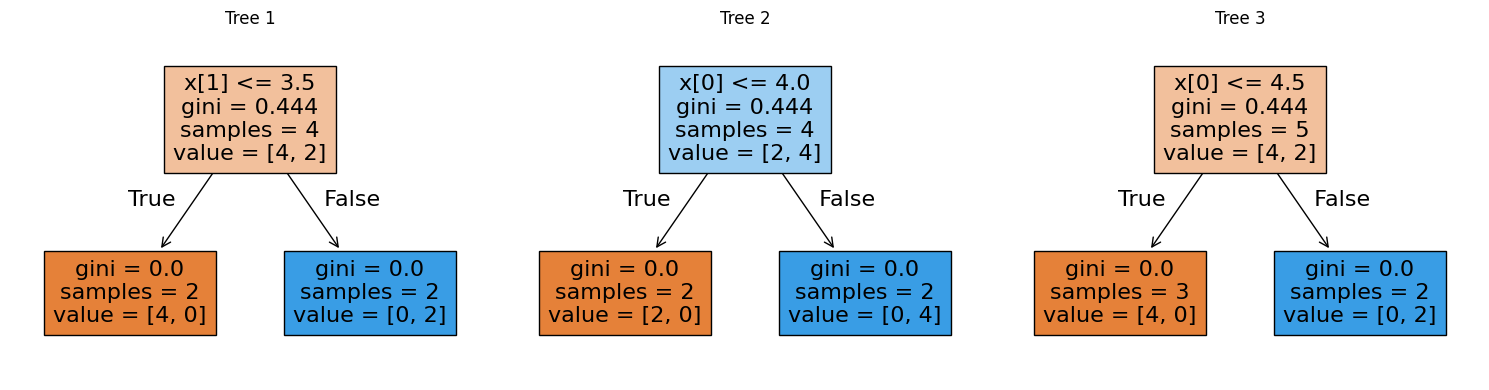

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Tiny dataset
X = [[1, 2], [2, 3], [3, 1], [5, 4], [6, 5], [7, 3]]
y = [0, 0, 0, 1, 1, 1]

# Train small Random Forest
rf = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=42,bootstrap=True,max_features='sqrt')
rf.fit(X, y)

# Plot each tree in the forest
plt.figure(figsize=(15, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plot_tree(rf.estimators_[i], filled=True)
    plt.title(f"Tree {i+1}")
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

for i, tree in enumerate(rf.estimators_):
    indices = rf.estimators_samples_[i]  # bootstrap indices used
    print(f"Tree {i+1} used samples:", Counter(indices))


Tree 1 used samples: Counter({np.int32(2): 3, np.int32(3): 1, np.int32(1): 1, np.int32(4): 1})
Tree 2 used samples: Counter({np.int32(3): 3, np.int32(1): 1, np.int32(5): 1, np.int32(2): 1})
Tree 3 used samples: Counter({np.int32(0): 2, np.int32(1): 1, np.int32(2): 1, np.int32(4): 1, np.int32(5): 1})
